# Rule Fit applied to Speciality

#### Made by:
* Teresa Marcelino (teresamarcelino98@gmail.com)


-------




In [54]:
%store -r Speciality_model_Ophthalmology
%store -r Best_Parameters_Regularizers_Ophthalmology
%store -r Rashomon_curve_speciality

In [55]:
%store -r Specialities_Dataset
%store -r list_specialities

----



## 1. Load Data and Libraries  <a class="anchor" id="1"></a> 


In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import shap
import matplotlib.pyplot as plt
#from rulefit import RuleFit

import sklearn

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
#Encoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *
import matplotlib
import copy
from datetime import datetime

from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

from tabulate import tabulate
import pickle
import math

In [57]:
import RuleFit_withoutCV as RuleFit_withoutCV

import RuleFit_customized as RuleFit_custom
from rulefit import RuleFit 
import pyowl
from pyowl import OwlRegressor

In [58]:
df_test_speciality = pd.read_csv('Data_test_speciality',header='infer')
df_test_speciality


,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,Doctor,CUF_Unit,Part of the day,I1,Month,Weekday,Anesthesia
0,0,1,0,4,11,1,36,68.0,60,43.375940,37.703783,39.423691,29.399988,35.055131,34.884527,53.486158
1,0,1,1,1,71,1,41,65.0,60,36.311628,37.703783,36.551606,29.399988,33.255834,32.554100,53.486158
2,0,1,1,5,16,1,30,73.0,60,27.969697,28.233843,36.551606,29.399988,36.000000,35.058103,28.201140
3,0,1,1,5,18,1,31,81.0,30,30.974576,26.387958,39.423691,29.399988,37.007716,36.602331,30.848830
4,0,1,1,2,83,1,58,86.0,60,36.311628,37.703783,36.551606,29.399988,33.342558,32.554100,53.486158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,0,1,1,2,1555,1,20,51.0,30,28.728209,35.808129,32.937803,29.399988,33.342558,36.602331,30.848830
2725,0,1,0,3,1415,1,25,73.0,30,28.728209,35.808129,36.551606,29.399988,35.937566,34.884527,30.848830
2726,0,1,0,2,1354,1,45,69.0,30,28.728209,35.808129,39.423691,29.399988,34.384065,34.884527,53.486158
2727,0,1,0,4,1303,1,30,69.0,20,28.728209,35.808129,39.423691,29.399988,36.000000,34.884527,30.848830


In [59]:
df_train_speciality = pd.read_csv('Data_withsyntheticdata_speciality',header='infer')
df_train_speciality

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,Doctor,CUF_Unit,Part of the day,I1,Month,Weekday,Anesthesia
0,0,1,1,2.0,240.0,1.0,47.261936,71.315091,NaN,35.888239,28.127457,37.998379,29.398867,34.720835,35.298601,30.850072
1,0,1,1,3.0,44.0,2.0,27.000000,71.000000,30.0,24.434579,29.894079,32.937803,31.382716,33.342558,36.602331,30.848830
2,0,1,1,3.0,85.0,1.0,46.000000,77.000000,NaN,45.378947,33.228385,33.029912,29.399988,36.893540,35.058103,30.848830
3,0,0,1,1.0,506.0,1.0,51.854021,67.398397,NaN,37.604121,36.941209,32.927294,29.401959,34.937211,35.250030,41.915108
4,0,1,1,3.0,42.0,1.0,25.000000,69.000000,30.0,33.147368,35.808129,36.551606,29.399988,37.007716,36.602331,30.848830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44049,0,1,1,1.0,869.0,2.0,51.595873,54.026953,NaN,39.066548,36.804034,36.242386,56.410442,35.032944,35.075822,53.485287
44050,0,1,1,1.0,148.0,2.0,70.000000,44.000000,NaN,60.986486,33.228385,75.987342,86.487544,35.862680,35.058103,53.486158
44051,0,1,1,5.0,288.0,1.0,58.527456,58.024760,NaN,28.728679,35.808947,39.423114,62.507795,35.868825,32.241604,53.488259
44052,0,1,1,2.0,767.0,3.0,109.000000,58.000000,NaN,37.604871,26.387958,36.551606,55.600000,34.790614,40.010771,53.486158


----


## 1. Speciality-specific RuleFit  <a class="anchor" id="1"></a> 

### 1.1.  Split Data  <a class="anchor" id="1.1"></a> 

In [7]:
train_dataset_speciality= df_train_speciality
test_dataset_speciality = df_test_speciality


train_features_speciality = train_dataset_speciality.copy()
test_features_speciality = test_dataset_speciality.copy()

train_labels_speciality = train_features_speciality.pop('Real Room Duration')
test_labels_speciality = test_features_speciality.pop('Real Room Duration')

train_CUF_labels_speciality = train_features_speciality.pop('CUF Planned Duration')
test_CUF_labels_speciality= test_features_speciality.pop('CUF Planned Duration')


#Resolve issue "Failed to convert a NumPy array to a Tensor (Unsupported object type int)""
specialitycolumns=train_features_speciality.columns
#Dataset
train_dataset_speciality= np.asarray(train_dataset_speciality).astype(np.float32)
test_dataset_speciality = np.asarray(test_dataset_speciality).astype(np.float32)

#Features
train_features_speciality= np.asarray(train_features_speciality).astype(np.float32)
test_features_speciality = np.asarray(test_features_speciality).astype(np.float32)

#labels
train_labels_speciality = np.asarray(train_labels_speciality).astype(np.float32)
test_labels_speciality = np.asarray(test_labels_speciality).astype(np.float32)


#CUF
train_CUF_labels_speciality = np.asarray(train_CUF_labels_speciality).astype(np.float32)
test_CUF_labels_speciality = np.asarray(test_CUF_labels_speciality).astype(np.float32)


### 1.2.  Parameters Tuning  <a class="anchor" id="1.2"></a> 




In [8]:
Tuning_models = {'Library_Script':['RuleFit_custom',
                                  'RuleFit_withoutCV'], 
                 'Decision_Tree':[RandomForestRegressor,
                                  GradientBoostingRegressor,
                                  BaggingRegressor,
                                  ExtraTreesRegressor],
                 'Regularizers_0':['LassoCV','ElasticNetCV','Pyowl'],
                 'Regularizers_1':['Lasso','ElasticNet','Pyowl'],
                 'Alphas':np.logspace(-8, math.log(3,10), 1000,base=10), #between 10^-7 and 3
                }

Tuning_models.update({'Cs':1./Tuning_models['Alphas']})

In [9]:
Best_Parameters_Decison_Tree_Speciality= {}

for i in Tuning_models['Decision_Tree']:
    # The Normalization layer
    Best_Parameters_Decison_Tree_Speciality[i] = {} 

In [10]:
Parameters_RandomForestRegressor = {'n_estimators':[100,250,500,750,1000,1250,1500,1750],
              'max_depth':[3,4]}

Parameters_GradientBoostingRegressor = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
                                        'n_estimators':[100,250,500,750,1000,1250,1500,1750],
                                        'max_depth':[6]}

Parameters_BaggingRegressor = {'n_estimators':[100,250,500,750,1000,1250,1500,1750],
                               'base_estimator__max_depth':[3,4]}

Parameters_ExtraTreesRegressor = {'n_estimators':[100,250,500,750,1000,1250,1500,1750],
                                  'max_depth':[3,4]}

Best_Parameters_Decison_Tree_Speciality[Tuning_models['Decision_Tree'][0]].update({"Search_Parameters": Parameters_RandomForestRegressor})
Best_Parameters_Decison_Tree_Speciality[Tuning_models['Decision_Tree'][1]].update({"Search_Parameters": Parameters_GradientBoostingRegressor})
Best_Parameters_Decison_Tree_Speciality[Tuning_models['Decision_Tree'][2]].update({"Search_Parameters": Parameters_BaggingRegressor})
Best_Parameters_Decison_Tree_Speciality[Tuning_models['Decision_Tree'][3]].update({"Search_Parameters": Parameters_ExtraTreesRegressor})




In [44]:
Speciality_model_Ophthalmology_depth5={} #creation of dictionaries for all 442 models 

for j in Tuning_models['Decision_Tree']:
        
    Speciality_model_Ophthalmology_depth5[j]={}


In [48]:
Speciality_model_Ophthalmology_depth6={} #creation of dictionaries for all 442 models 

for j in Tuning_models['Decision_Tree']:
        
    Speciality_model_Ophthalmology_depth6[j]={}

* ### 1.2.1  Tuning Decision Trees  <a class="anchor" id="1.2.1"></a> 


In [14]:
for i in range(len(Tuning_models['Decision_Tree'])):
    if i!=2:
        Decison_Tree=Tuning_models['Decision_Tree'][i](random_state=123)
    else:
        Decison_Tree=Tuning_models['Decision_Tree'][i](base_estimator=DecisionTreeRegressor(),random_state=123)

    Parameters_Decision_Tree=Best_Parameters_Decison_Tree_Speciality[Tuning_models['Decision_Tree'][i]]["Search_Parameters"]

    tuning = GridSearchCV(estimator=Decison_Tree, 
                              param_grid = Parameters_Decision_Tree, 
                              scoring='neg_mean_absolute_error',n_jobs=-1, cv=5,verbose=1)


    tuning.fit(train_features_speciality, train_labels_speciality)
    Best_estimator=tuning.best_estimator_
    Best_params=tuning.best_params_

    print(Tuning_models['Decision_Tree'][i])

    Speciality_model_Ophthalmology[Tuning_models['Decision_Tree'][i]].update({"Best_estimator": Best_estimator})
    Speciality_model_Ophthalmology[Tuning_models['Decision_Tree'][i]].update({"Best_params_dict": Best_params})



Fitting 5 folds for each of 16 candidates, totalling 80 fits
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
Fitting 5 folds for each of 96 candidates, totalling 480 fits
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Fitting 5 folds for each of 16 candidates, totalling 80 fits
<class 'sklearn.ensemble._bagging.BaggingRegressor'>
Fitting 5 folds for each of 16 candidates, totalling 80 fits
<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>


In [45]:
for i in range(len(Tuning_models['Decision_Tree'])):
    
    if i==1:
        if i!=2:
            Decison_Tree=Tuning_models['Decision_Tree'][i](random_state=123)
        else:
            Decison_Tree=Tuning_models['Decision_Tree'][i](base_estimator=DecisionTreeRegressor(),random_state=123)

        Parameters_Decision_Tree=Best_Parameters_Decison_Tree_Speciality[Tuning_models['Decision_Tree'][i]]["Search_Parameters"]

        tuning = GridSearchCV(estimator=Decison_Tree, 
                                  param_grid = Parameters_Decision_Tree, 
                                  scoring='neg_mean_absolute_error',n_jobs=-1, cv=5,verbose=1)


        tuning.fit(train_features_speciality, train_labels_speciality)
        Best_estimator=tuning.best_estimator_
        Best_params=tuning.best_params_

        print(Tuning_models['Decision_Tree'][i])

        Speciality_model_Ophthalmology_depth5[Tuning_models['Decision_Tree'][i]].update({"Best_estimator": Best_estimator})
        Speciality_model_Ophthalmology_depth5[Tuning_models['Decision_Tree'][i]].update({"Best_params_dict": Best_params})


Fitting 5 folds for each of 48 candidates, totalling 240 fits
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


In [46]:
%store Speciality_model_Ophthalmology_depth5

Stored 'Speciality_model_Ophthalmology_depth5' (dict)


In [49]:
for i in range(len(Tuning_models['Decision_Tree'])):
    
    if i==1:
        if i!=2:
            Decison_Tree=Tuning_models['Decision_Tree'][i](random_state=123)
        else:
            Decison_Tree=Tuning_models['Decision_Tree'][i](base_estimator=DecisionTreeRegressor(),random_state=123)

        Parameters_Decision_Tree=Best_Parameters_Decison_Tree_Speciality[Tuning_models['Decision_Tree'][i]]["Search_Parameters"]

        tuning = GridSearchCV(estimator=Decison_Tree, 
                                  param_grid = Parameters_Decision_Tree, 
                                  scoring='neg_mean_absolute_error',n_jobs=-1, cv=5,verbose=1)


        tuning.fit(train_features_speciality, train_labels_speciality)
        Best_estimator=tuning.best_estimator_
        Best_params=tuning.best_params_

        print(Tuning_models['Decision_Tree'][i])

        Speciality_model_Ophthalmology_depth6[Tuning_models['Decision_Tree'][i]].update({"Best_estimator": Best_estimator})
        Speciality_model_Ophthalmology_depth6[Tuning_models['Decision_Tree'][i]].update({"Best_params_dict": Best_params})


Fitting 5 folds for each of 48 candidates, totalling 240 fits
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


In [50]:
%store Speciality_model_Ophthalmology_depth6

Stored 'Speciality_model_Ophthalmology_depth6' (dict)


In [ ]:
for i in range(len(Tuning_models['Decision_Tree'])):
    if i!=2:
        Decison_Tree=Tuning_models['Decision_Tree'][i](random_state=123)
    else:
        Decison_Tree=Tuning_models['Decision_Tree'][i](base_estimator=DecisionTreeRegressor(),random_state=123)

    Parameters_Decision_Tree=Best_Parameters_Decison_Tree_Speciality[Tuning_models['Decision_Tree'][i]]["Search_Parameters"]

    tuning = GridSearchCV(estimator=Decison_Tree, 
                              param_grid = Parameters_Decision_Tree, 
                              scoring='neg_mean_absolute_error',n_jobs=-1, cv=5,verbose=1)


    tuning.fit(train_features_speciality, train_labels_speciality)
    Best_estimator=tuning.best_estimator_
    Best_params=tuning.best_params_

    print(Tuning_models['Decision_Tree'][i])

    Speciality_model_Ophthalmology[Tuning_models['Decision_Tree'][i]].update({"Best_estimator": Best_estimator})
    Speciality_model_Ophthalmology[Tuning_models['Decision_Tree'][i]].update({"Best_params_dict": Best_params})


In [11]:
%store -r Speciality_model_Ophthalmology

### 1.3.  Perform Rulefit for all DecisionTree and Regularizers  <a class="anchor" id="1.3"></a> 


In [16]:
Best_Parameters_Regularizers_Ophthalmology= {}

for r in Tuning_models['Library_Script']:
        # The Normalization layer
        Best_Parameters_Regularizers_Ophthalmology[r] = {}

        for l in Tuning_models['Decision_Tree']:
        # The Normalization layer
            Best_Parameters_Regularizers_Ophthalmology[r][l] = {}

            for j in range(len(Tuning_models['Regularizers_0'])):

                if r==Tuning_models['Library_Script'][0]:

                    Best_Parameters_Regularizers_Ophthalmology[r][l][Tuning_models['Regularizers_0'][j]]={}

                else:
                    Best_Parameters_Regularizers_Ophthalmology[r][l][Tuning_models['Regularizers_1'][j]]={}


In [17]:

def percCal(x,y):
    return (x-y)*100/x

In [25]:
r=1

for l in range(len(Tuning_models['Decision_Tree'])):
    
    i=l+1
    Parameters=Speciality_model_Ophthalmology[Tuning_models['Decision_Tree'][i]]["Best_params_dict"]


    if i==0 or i==3:                                                                            
        Decison_Tree=Tuning_models['Decision_Tree'][i](random_state=123,max_depth=Parameters["max_depth"],n_estimators=Parameters["n_estimators"])
        print(Decison_Tree)

    if i==1:                                                                            
        Decison_Tree=Tuning_models['Decision_Tree'][i](random_state=123,learning_rate=Parameters["learning_rate"],max_depth=Parameters["max_depth"],n_estimators=Parameters["n_estimators"])
        print(Decison_Tree)

    if i==2:
        Decison_Tree=Tuning_models['Decision_Tree'][i](base_estimator=DecisionTreeRegressor(max_depth=Parameters["base_estimator__max_depth"]),n_estimators=Parameters["n_estimators"],random_state=123)

        print(Decison_Tree)

    for t in range(len(Tuning_models['Regularizers_0'])):


        Decison_Tree_tune=copy.deepcopy(Decison_Tree)

        if r==0:
            regularizer=Tuning_models['Regularizers_0'][j]

        else:
            regularizer=Tuning_models['Regularizers_1'][j]

        print(regularizer)

        Cs=Tuning_models['Cs']

        beta=0.1
        alpha=0.001
        j=2
        if j==2:
            
            len_reduce_rules=1000
            max_tents=0
            max_tents=0
            minimum_rules=float('Inf')
            while len_reduce_rules>50 and max_tents<=15:

                Decison_Tree_tune=copy.deepcopy(Decison_Tree)

                if r==0:

                    rf = RuleFit_custom.RuleFit(tree_generator=Decison_Tree_tune, Cs=Cs, beta=beta, max_iter=10e10, regularization='Pyowl',n_jobs=-1)

                else:
                    rf = RuleFit_withoutCV.RuleFit(tree_generator=Decison_Tree_tune, Cs=Cs, beta=beta, max_iter=10e10, regularization='Pyowl',n_jobs=-1)


                rf.fit(train_features_speciality, train_labels_speciality, feature_names=specialitycolumns)

                rules = rf.get_rules()

                reduce_rules = rules[abs(rules.coef) !=0].sort_values("coef", ascending=False)

                if len(reduce_rules)< minimum_rules:
                    minimum_rules=len(reduce_rules)
                    max_tents=0

                else:
                    max_tents=max_tents+1


                len_reduce_rules=len(reduce_rules)

                print(len_reduce_rules)

                rf_score = np.round(r2_score(rf.predict(test_features_speciality),test_labels_speciality),2)

                predictions=rf.predict(test_features_speciality)

                beta=beta+1
        else:
            len_reduce_rules=1000
            max_rules=1000
            while len_reduce_rules>50:

                Decison_Tree_tune=copy.deepcopy(Decison_Tree)
                print(max_rules)
                if r==0:
                    rf = RuleFit_custom.RuleFit(max_rules=max_rules,tree_generator=Decison_Tree_tune, alpha=alpha,Cs=Cs, max_iter=10e10, regularization=regularizer,n_jobs=-1)

                else:    
                    rf = RuleFit_withoutCV.RuleFit(tree_generator=Decison_Tree_tune,alpha=alpha, Cs=Cs, max_iter=10e10, regularization=regularizer,n_jobs=-1)


                rf.fit(train_features_speciality, train_labels_speciality, feature_names=specialitycolumns)

                rules = rf.get_rules()

                reduce_rules = rules[abs(rules.coef) !=0].sort_values("coef", ascending=False)


                len_reduce_rules=len(reduce_rules)

                print(len_reduce_rules)

                rf_score = np.round(r2_score(rf.predict(test_features_speciality),test_labels_speciality),2)

                predictions=rf.predict(test_features_speciality)

                if j==0:
                    if len_reduce_rules>120:
                        alpha+=0.05

                    else:
                        alpha+=0.005
                        
                if j==1:
                    if len_reduce_rules>120:
                        alpha+=1.2

                    else:
                        alpha+=0.35


                if max_rules<=100:
                    max_rules+=-10

                else:
                    max_rules+=-100



        print(rf_score)

        dataset_predicton = {"Real Duration": test_labels_speciality, "Planned by Cuf": test_CUF_labels_speciality, "Labels from RuleFit": predictions}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

        Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Model": rf})
        Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Rules": rules})

        Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Rules_non0": reduce_rules})

        Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Number Rules": len(reduce_rules)})
        Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Score": rf_score})
        Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Predictions": predictions})
        Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Dataset_predicton": dataset_predicton})

        Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Percentage": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Percentage_CUF": [CUF_Within, CUF_under, CUF_overuse]})



GradientBoostingRegressor(max_depth=4, n_estimators=1500, random_state=123)
Pyowl
1438
1509
1407
1380
1276
836
593
445
312
228
242
239
212
179
168
167
152
159
120
110
130
119
115
110
90
106
110
92
93
79
85
105
65
89
66
83
80
71
55
81
79
62
71
80
63
83
54
72
66
44
0.0
Pyowl
1432
1432
1430
1362
1059
820
578
452
260
248
191
225
209


KeyboardInterrupt: 

In [12]:
%store -r Best_Parameters_Regularizers_Ophthalmology

In [15]:
keep=[]

r=1
for i in range(len(Tuning_models['Decision_Tree'])):

    for j in range(len(Tuning_models['Regularizers_0'])):
        if r==0:
            Percentage=Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_0'][j]]['Percentage']

            name="Model{}_{}_{}".format('WithCV',Tuning_models['Decision_Tree'][i],Tuning_models['Regularizers_0'][j])
            keep=keep+[[name, Percentage[0], Percentage[2],Percentage[1]]]

        else:
            Percentage=Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_1'][j]]['Percentage']

            name="Model{}_{}_{}".format('WithoutCV',Tuning_models['Decision_Tree'][i],Tuning_models['Regularizers_1'][j])
            keep=keep+[[name, Percentage[0], Percentage[2],Percentage[1]]]



In [16]:

Score=[]

r=1

for i in range(len(Tuning_models['Decision_Tree'])):

    for j in range(len(Tuning_models['Regularizers_0'])):

        if r==0:
            Score_model=Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_0'][j]]['Score']

            rules=Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_0'][j]]['Number Rules']

            name="Model_{}_{}_{}".format('WithCV',Tuning_models['Decision_Tree'][i],Tuning_models['Regularizers_0'][j])
            Score=Score+[[name,Score_model,rules]]

        else:
            Score_model=Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_1'][j]]['Score']

            rules=Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_1'][j]]['Number Rules']

            name="Model_{}_{}_{}".format('WithoutCV',Tuning_models['Decision_Tree'][i],Tuning_models['Regularizers_1'][j])
            Score=Score+[[name,Score_model,rules]]
        
table2 = [['Model', 'Score', 'Number of Rules']]

for i in range(len(Score)):
    table2=table2+[Score[i]]
print(tabulate(table2))

-----------------------------------------------------------------------------------  ---------  ---------------
Model                                                                                Score      Number of Rules
Model_WithoutCV_<class 'sklearn.ensemble._forest.RandomForestRegressor'>_Lasso       0.31       47
Model_WithoutCV_<class 'sklearn.ensemble._forest.RandomForestRegressor'>_ElasticNet  0.0        0
Model_WithoutCV_<class 'sklearn.ensemble._forest.RandomForestRegressor'>_Pyowl       0.16       765
Model_WithoutCV_<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>_Lasso       0.19       45
Model_WithoutCV_<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>_ElasticNet  -284.99    47
Model_WithoutCV_<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>_Pyowl       0.0        44
Model_WithoutCV_<class 'sklearn.ensemble._bagging.BaggingRegressor'>_Lasso           0.3        47
Model_WithoutCV_<class 'sklearn.ensemble._bagging.BaggingRegressor'>_ElasticNet    

In [17]:
CUF=Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][1]][Tuning_models['Decision_Tree'][1]][Tuning_models['Regularizers_1'][1]]['Percentage_CUF']
            
table2 = [['Model', 'Within', 'Overutilization','Underutilization'], 
          ['CUF Model', CUF[0], CUF[2],CUF[1]]]

for i in range(len(keep)):
    
    table2=table2+[keep[i]]
print(tabulate(table2))

----------------------------------------------------------------------------------  -------------------  -------------------  ------------------
Model                                                                               Within               Overutilization      Underutilization
CUF Model                                                                           0.15793330890436058  0.22572370831806524  0.6163429827775742
ModelWithoutCV_<class 'sklearn.ensemble._forest.RandomForestRegressor'>_Lasso       0.20410406742396484  0.2671308171491389   0.5287651154268963
ModelWithoutCV_<class 'sklearn.ensemble._forest.RandomForestRegressor'>_ElasticNet  0.0348112861854159   0.09307438622205937  0.8721143275925247
ModelWithoutCV_<class 'sklearn.ensemble._forest.RandomForestRegressor'>_Pyowl       0.1835837303041407   0.23451813851227557  0.5818981311835837
ModelWithoutCV_<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>_Lasso       0.21289849761817514  0.25943569072920486  0.5276

### 1.4.  Choose Best Rulefit Model  <a class="anchor" id="1.4"></a> 


In [18]:

Script=1
tree=1
regularizer=0

In [19]:
Best_model_speciality=Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][Script]][Tuning_models['Decision_Tree'][tree]][Tuning_models['Regularizers_1'][regularizer]]["Model"]

In [20]:
# Record r2 score from RuleFit model
rf_score  = Best_Parameters_Regularizers_Ophthalmology[Tuning_models['Library_Script'][Script]][Tuning_models['Decision_Tree'][tree]][Tuning_models['Regularizers_1'][regularizer]]["Score"]
rf_score



0.19

In [17]:
predictions=Best_model_speciality.predict(test_features_speciality)


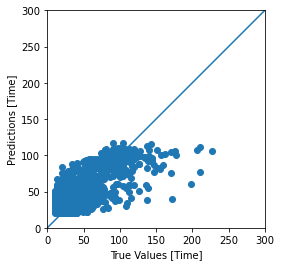

In [18]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels_speciality, predictions)
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

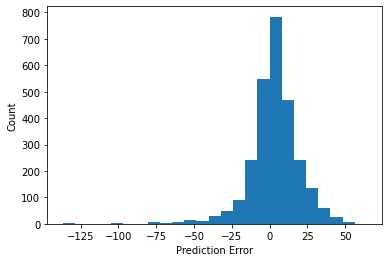

In [19]:
error = predictions - test_labels_speciality
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [20]:
dataset_predicton = {"Real Duration": test_labels_speciality, "Planned by Cuf": test_CUF_labels_speciality, "Labels from RuleFit": predictions}
dataset_predicton=pd.DataFrame(dataset_predicton)
dataset_predicton



,Real Duration,Planned by Cuf,Labels from RuleFit
0,36.0,60.0,51.301727
1,41.0,60.0,43.392257
2,30.0,60.0,20.587360
3,31.0,30.0,30.341023
4,58.0,60.0,39.906298
...,...,...,...
2724,20.0,30.0,29.999453
2725,25.0,30.0,25.627756
2726,45.0,30.0,28.289717
2727,30.0,20.0,23.401458


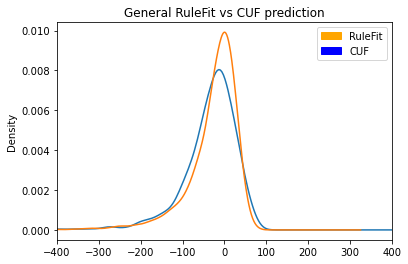

In [21]:

def percCal(x,y):
    return (x-y)*100/x

dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_RuleFit'].plot(kind='density')
plt.xlim([-400, 400])
plt.title('General RuleFit vs CUF prediction')
orange_patch = matplotlib.patches.Patch(color='orange', label='RuleFit')
blue_patch = matplotlib.patches.Patch(color='blue', label='CUF')
plt.legend(handles=[orange_patch,blue_patch])

In [22]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['RuleFit Model', RuleFit_Within, RuleFit_overuse,RuleFit_under]]
print(tabulate(table2))

-------------  -------------------  -------------------  ------------------
Model          Within               Overutilization      Underutilization
CUF Model      0.15793330890436058  0.22572370831806524  0.6163429827775742
RuleFit Model  0.21289849761817514  0.25943569072920486  0.52766581165262
-------------  -------------------  -------------------  ------------------


-----

# Design Rashomon Curve

In [13]:
number_of_rules=10

In [41]:


Rashomon_curve_speciality= {}

for j in range(0,2):
        # The Normalization layer
    Rashomon_curve_speciality[j] = {}

    for r in range(number_of_rules):
            # The Normalization layer
        Rashomon_curve_speciality[j][r] = {}

       

In [51]:


Rashomon_curve_speciality_depth5= {}

for j in range(0,2):
        # The Normalization layer
    Rashomon_curve_speciality_depth5[j] = {}

    for r in range(number_of_rules):
            # The Normalization layer
        Rashomon_curve_speciality_depth5[j][r] = {}


In [52]:


Rashomon_curve_speciality_depth6= {}

for j in range(0,2):
        # The Normalization layer
    Rashomon_curve_speciality_depth6[j] = {}

    for r in range(number_of_rules):
            # The Normalization layer
        Rashomon_curve_speciality_depth6[j][r] = {}

In [44]:
Datasets_speciality_ophthalmology=Specialities_Dataset['Ophthalmology']

In [14]:

def percCal(x,y):
    return (x-y)*100/x

def percCal2(x,y):
    return abs(x-y)



In [79]:
alphas=[]

for j in range(0,2):
    print(j)
    if j==0:
        train_dataset_speciality= Datasets_speciality_ophthalmology['TrainSet']
        test_dataset_speciality= Datasets_speciality_ophthalmology['TestSet']
        train_dataset_speciality_categorical=Datasets_speciality_ophthalmology['TrainSet'][Datasets_speciality_ophthalmology['TrainSet']['Real Room Duration']>40]
        test_dataset_speciality_categorical=Datasets_speciality_ophthalmology['TestSet'][Datasets_speciality_ophthalmology['TestSet']['Real Room Duration']>40]
        
        
    if j==1:
        train_dataset_speciality= df_train_speciality
        test_dataset_speciality= df_test_speciality
        train_dataset_speciality_categorical= df_train_speciality[df_train_speciality['Real Room Duration']>40]
        test_dataset_speciality_categorical= df_test_speciality[df_test_speciality['Real Room Duration']>40]
        
    
        
    r=1
    
    Parameters=Speciality_model_Ophthalmology_depth5[Tuning_models['Decision_Tree'][1]]["Best_params_dict"]

    Decison_Tree=Tuning_models['Decision_Tree'][1](random_state=123,learning_rate=Parameters["learning_rate"],max_depth=Parameters["max_depth"],n_estimators=Parameters["n_estimators"])
    print(Decison_Tree)


    regularizer=Tuning_models['Regularizers_1'][0]



    print(regularizer)

    Cs=Tuning_models['Cs']

    beta=0.1
    alpha=0.0001
    
    train_features_speciality = train_dataset_speciality.copy()

    train_labels_speciality = train_features_speciality.pop('Real Room Duration')

    train_CUF_labels_speciality = train_features_speciality.pop('CUF Planned Duration')
    
    test_features_speciality = test_dataset_speciality.copy()

    test_labels_speciality = test_features_speciality.pop('Real Room Duration')

    test_CUF_labels_speciality = test_features_speciality.pop('CUF Planned Duration')
    #-----
    
    

    train_features_speciality_categorical = train_dataset_speciality_categorical.copy()

    train_labels_speciality_categorical = train_features_speciality_categorical.pop('Real Room Duration')

    train_CUF_labels_speciality_categorical = train_features_speciality_categorical.pop('CUF Planned Duration')
    
    test_features_speciality_categorical = test_dataset_speciality_categorical.copy()

    test_labels_speciality_categorical = test_features_speciality_categorical.pop('Real Room Duration')

    test_CUF_labels_speciality_categorical = test_features_speciality_categorical.pop('CUF Planned Duration')




    #Dataset
    train_dataset_speciality= np.asarray(train_dataset_speciality).astype(np.float32)

    #Features
    train_features_speciality= np.asarray(train_features_speciality).astype(np.float32)

    #labels
    train_labels_speciality= np.asarray(train_labels_speciality).astype(np.float32)
    
    #Dataset
    train_dataset_speciality_categorical= np.asarray(train_dataset_speciality_categorical).astype(np.float32)

    #Features
    train_features_speciality_categorical= np.asarray(train_features_speciality_categorical).astype(np.float32)

    #labels
    train_labels_speciality_categorical= np.asarray(train_labels_speciality_categorical).astype(np.float32)
    
    
    ##---
    
    #Dataset
    test_dataset_speciality= np.asarray(test_dataset_speciality).astype(np.float32)

    #Features
    test_features_speciality= np.asarray(test_features_speciality).astype(np.float32)

    #labels
    test_labels_speciality= np.asarray(test_labels_speciality).astype(np.float32)
    
    #Dataset
    test_dataset_speciality_categorical= np.asarray(test_dataset_speciality_categorical).astype(np.float32)

    #Features
    test_features_speciality_categorical= np.asarray(test_features_speciality_categorical).astype(np.float32)

    #labels
    test_labels_speciality_categorical= np.asarray(test_labels_speciality_categorical).astype(np.float32)
    

    t=0
    for rules_n in range(number_of_rules):
        

        max_rules=(10-rules_n)*10

        len_reduce_rules=1000

        while len_reduce_rules>max_rules:

            Decison_Tree_tune=copy.deepcopy(Decison_Tree)

            rf = RuleFit_withoutCV.RuleFit(tree_generator=Decison_Tree_tune,alpha=alpha, Cs=Cs, max_iter=10e10, regularization=regularizer,n_jobs=-1)


            rf.fit(train_features_speciality, train_labels_speciality, feature_names=specialitycolumns)

            rules = rf.get_rules()

            reduce_rules = rules[abs(rules.coef) !=0].sort_values("coef", ascending=False)


            len_reduce_rules=len(reduce_rules)

            print(len_reduce_rules)

            rf_score_train = np.round(mean_squared_error(rf.predict(train_features_speciality),train_labels_speciality,squared=False))

          

            rf_score = np.round(mean_squared_error(rf.predict(test_features_speciality),test_labels_speciality,squared=False))

            
            predictions=rf.predict(test_features_speciality)

            if len_reduce_rules>200:
                alpha+=0.05

                
            if len_reduce_rules>max_rules+20:
                alpha+=0.010

            else:
                alpha+=0.01
                
        
            
        print(alphas)


        dataset_predicton = {"Real Duration": test_labels_speciality, "Planned by Cuf": test_CUF_labels_speciality, "Labels from RuleFit": predictions}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

        Rashomon_curve_speciality_depth5[j][rules_n].update({"Model": rf})
        Rashomon_curve_speciality_depth5[j][rules_n].update({"Rules": rules})

        Rashomon_curve_speciality_depth5[j][rules_n].update({"Rules_non0": reduce_rules})

        Rashomon_curve_speciality_depth5[j][rules_n].update({"Number Rules": len(reduce_rules)})
        Rashomon_curve_speciality_depth5[j][rules_n].update({"TestScore": rf_score})
        Rashomon_curve_speciality_depth5[j][rules_n].update({"TrainScore": rf_score_train})
        Rashomon_curve_speciality_depth5[j][rules_n].update({"Predictions": predictions})
        Rashomon_curve_speciality_depth5[j][rules_n].update({"Dataset_predicton": dataset_predicton})

        Rashomon_curve_speciality_depth5[j][rules_n].update({"Percentage": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        Rashomon_curve_speciality_depth5[j][rules_n].update({"Percentage_CUF": [CUF_Within, CUF_under, CUF_overuse]})
        
        predictions_train=rf.predict(train_features_speciality)
        
        rf_score_test =mean_squared_error(rf.predict(test_features_speciality),test_labels_speciality,squared=False)
        
        rf_score_train = mean_squared_error(rf.predict(train_features_speciality),train_labels_speciality,squared=False)
        
        
       
        
        rf_score_test_categorical = mean_squared_error(rf.predict(test_features_speciality_categorical),test_labels_speciality_categorical,squared=False)
        
        rf_score_train_categorical = mean_squared_error(rf.predict(train_features_speciality_categorical),train_labels_speciality_categorical,squared=False)
        

        dataset_predicton = {"Real Duration": train_labels_speciality, "Planned by Cuf": train_CUF_labels_speciality, "Labels from RuleFit": predictions_train}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

        Rashomon_curve_speciality_depth5[j][rules_n].update({"Score R2 Train": rf_score_train})
        Rashomon_curve_speciality_depth5[j][rules_n].update({"Score R2 Test": rf_score_test})
        Rashomon_curve_speciality_depth5[j][rules_n].update({"Score R2 Train Categorical": rf_score_train_categorical})
        Rashomon_curve_speciality_depth5[j][rules_n].update({"Score R2 Test Categorical": rf_score_test_categorical})
        
        Rashomon_curve_speciality_depth5[j][rules_n].update({"Percentage_Train": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        
        #------
        
        predictions_test_categorical=rf.predict(test_features_speciality_categorical)
        
        dataset_predicton = {"Real Duration": test_labels_speciality_categorical, "Planned by Cuf": test_CUF_labels_speciality_categorical, "Labels from RuleFit": predictions_test_categorical}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        
        Rashomon_curve_speciality_depth5[j][rules_n].update({"Percentage Test Categorical": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        
        
        #------
        
        predictions_train_categorical=rf.predict(train_features_speciality_categorical)
        
        dataset_predicton = {"Real Duration": train_labels_speciality_categorical, "Planned by Cuf": train_CUF_labels_speciality_categorical, "Labels from RuleFit": predictions_train_categorical}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        
        Rashomon_curve_speciality_depth5[j][rules_n].update({"Percentage Train Categorical": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        


1
GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=1750,
                          random_state=123)
Lasso
15
12
10
[]


In [60]:
%store -r Rashomon_curve_speciality

In [ ]:
alphas=[]

for j in range(1,2):
    print(j)
    if j==0:
        train_dataset_speciality= Datasets_speciality_ophthalmology['TrainSet']
        test_dataset_speciality= Datasets_speciality_ophthalmology['TestSet']
        train_dataset_speciality_categorical=Datasets_speciality_ophthalmology['TrainSet'][Datasets_speciality_ophthalmology['TrainSet']['Real Room Duration']>40]
        test_dataset_speciality_categorical=Datasets_speciality_ophthalmology['TestSet'][Datasets_speciality_ophthalmology['TestSet']['Real Room Duration']>40]
        
        
    if j==1:
        train_dataset_speciality= df_train_speciality
        test_dataset_speciality= df_test_speciality
        train_dataset_speciality_categorical= df_train_speciality[df_train_speciality['Real Room Duration']>40]
        test_dataset_speciality_categorical= df_test_speciality[df_test_speciality['Real Room Duration']>40]
        
    
        
    r=1
    
    Parameters=Speciality_model_Ophthalmology_depth6[Tuning_models['Decision_Tree'][1]]["Best_params_dict"]

    Decison_Tree=Tuning_models['Decision_Tree'][1](random_state=123,learning_rate=Parameters["learning_rate"],max_depth=Parameters["max_depth"],n_estimators=Parameters["n_estimators"])
    print(Decison_Tree)


    regularizer=Tuning_models['Regularizers_1'][0]



    print(regularizer)

    Cs=Tuning_models['Cs']

    beta=0.1
    alpha=0.0001
    
    train_features_speciality = train_dataset_speciality.copy()

    train_labels_speciality = train_features_speciality.pop('Real Room Duration')

    train_CUF_labels_speciality = train_features_speciality.pop('CUF Planned Duration')
    
    test_features_speciality = test_dataset_speciality.copy()

    test_labels_speciality = test_features_speciality.pop('Real Room Duration')

    test_CUF_labels_speciality = test_features_speciality.pop('CUF Planned Duration')
    #-----
    
    

    train_features_speciality_categorical = train_dataset_speciality_categorical.copy()

    train_labels_speciality_categorical = train_features_speciality_categorical.pop('Real Room Duration')

    train_CUF_labels_speciality_categorical = train_features_speciality_categorical.pop('CUF Planned Duration')
    
    test_features_speciality_categorical = test_dataset_speciality_categorical.copy()

    test_labels_speciality_categorical = test_features_speciality_categorical.pop('Real Room Duration')

    test_CUF_labels_speciality_categorical = test_features_speciality_categorical.pop('CUF Planned Duration')




    #Dataset
    train_dataset_speciality= np.asarray(train_dataset_speciality).astype(np.float32)

    #Features
    train_features_speciality= np.asarray(train_features_speciality).astype(np.float32)

    #labels
    train_labels_speciality= np.asarray(train_labels_speciality).astype(np.float32)
    
    #Dataset
    train_dataset_speciality_categorical= np.asarray(train_dataset_speciality_categorical).astype(np.float32)

    #Features
    train_features_speciality_categorical= np.asarray(train_features_speciality_categorical).astype(np.float32)

    #labels
    train_labels_speciality_categorical= np.asarray(train_labels_speciality_categorical).astype(np.float32)
    
    
    ##---
    
    #Dataset
    test_dataset_speciality= np.asarray(test_dataset_speciality).astype(np.float32)

    #Features
    test_features_speciality= np.asarray(test_features_speciality).astype(np.float32)

    #labels
    test_labels_speciality= np.asarray(test_labels_speciality).astype(np.float32)
    
    #Dataset
    test_dataset_speciality_categorical= np.asarray(test_dataset_speciality_categorical).astype(np.float32)

    #Features
    test_features_speciality_categorical= np.asarray(test_features_speciality_categorical).astype(np.float32)

    #labels
    test_labels_speciality_categorical= np.asarray(test_labels_speciality_categorical).astype(np.float32)
    

    t=0
    for rules_n in range(3,number_of_rules):
        

        max_rules=(10-rules_n)*10

        len_reduce_rules=1000

        while len_reduce_rules>max_rules:

            Decison_Tree_tune=copy.deepcopy(Decison_Tree)

            rf = RuleFit_withoutCV.RuleFit(tree_generator=Decison_Tree_tune,alpha=alpha, Cs=Cs, max_iter=10e10, regularization=regularizer,n_jobs=-1)


            rf.fit(train_features_speciality, train_labels_speciality, feature_names=specialitycolumns)

            rules = rf.get_rules()

            reduce_rules = rules[abs(rules.coef) !=0].sort_values("coef", ascending=False)


            len_reduce_rules=len(reduce_rules)

            print(len_reduce_rules)

            rf_score_train = np.round(mean_squared_error(rf.predict(train_features_speciality),train_labels_speciality,squared=False))

          

            rf_score = np.round(mean_squared_error(rf.predict(test_features_speciality),test_labels_speciality,squared=False))

            
            predictions=rf.predict(test_features_speciality)

            if len_reduce_rules>200:
                alpha+=0.05

                
            if len_reduce_rules>max_rules+20:
                alpha+=0.007

            else:
                alpha+=0.01
                
        
            
        print(alphas)


        dataset_predicton = {"Real Duration": test_labels_speciality, "Planned by Cuf": test_CUF_labels_speciality, "Labels from RuleFit": predictions}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

        Rashomon_curve_speciality_depth6[j][rules_n].update({"Model": rf})
        Rashomon_curve_speciality_depth6[j][rules_n].update({"Rules": rules})

        Rashomon_curve_speciality_depth6[j][rules_n].update({"Rules_non0": reduce_rules})

        Rashomon_curve_speciality_depth6[j][rules_n].update({"Number Rules": len(reduce_rules)})
        Rashomon_curve_speciality_depth6[j][rules_n].update({"TestScore": rf_score})
        Rashomon_curve_speciality_depth6[j][rules_n].update({"TrainScore": rf_score_train})
        Rashomon_curve_speciality_depth6[j][rules_n].update({"Predictions": predictions})
        Rashomon_curve_speciality_depth6[j][rules_n].update({"Dataset_predicton": dataset_predicton})

        Rashomon_curve_speciality_depth6[j][rules_n].update({"Percentage": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        Rashomon_curve_speciality_depth6[j][rules_n].update({"Percentage_CUF": [CUF_Within, CUF_under, CUF_overuse]})
        
        predictions_train=rf.predict(train_features_speciality)
        
        rf_score_test =mean_squared_error(rf.predict(test_features_speciality),test_labels_speciality,squared=False)
        
        rf_score_train = mean_squared_error(rf.predict(train_features_speciality),train_labels_speciality,squared=False)
        
        
       
        
        rf_score_test_categorical = mean_squared_error(rf.predict(test_features_speciality_categorical),test_labels_speciality_categorical,squared=False)
        
        rf_score_train_categorical = mean_squared_error(rf.predict(train_features_speciality_categorical),train_labels_speciality_categorical,squared=False)
        

        dataset_predicton = {"Real Duration": train_labels_speciality, "Planned by Cuf": train_CUF_labels_speciality, "Labels from RuleFit": predictions_train}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

        Rashomon_curve_speciality_depth6[j][rules_n].update({"Score R2 Train": rf_score_train})
        Rashomon_curve_speciality_depth6[j][rules_n].update({"Score R2 Test": rf_score_test})
        Rashomon_curve_speciality_depth6[j][rules_n].update({"Score R2 Train Categorical": rf_score_train_categorical})
        Rashomon_curve_speciality_depth6[j][rules_n].update({"Score R2 Test Categorical": rf_score_test_categorical})
        
        Rashomon_curve_speciality_depth6[j][rules_n].update({"Percentage_Train": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        
        #------
        
        predictions_test_categorical=rf.predict(test_features_speciality_categorical)
        
        dataset_predicton = {"Real Duration": test_labels_speciality_categorical, "Planned by Cuf": test_CUF_labels_speciality_categorical, "Labels from RuleFit": predictions_test_categorical}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        
        Rashomon_curve_speciality_depth6[j][rules_n].update({"Percentage Test Categorical": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        
        
        #------
        
        predictions_train_categorical=rf.predict(train_features_speciality_categorical)
        
        dataset_predicton = {"Real Duration": train_labels_speciality_categorical, "Planned by Cuf": train_CUF_labels_speciality_categorical, "Labels from RuleFit": predictions_train_categorical}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        
        Rashomon_curve_speciality_depth6[j][rules_n].update({"Percentage Train Categorical": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        

In [ ]:
%store Rashomon_curve_speciality_depth6

In [61]:
%store -r Rashomon_curve_speciality

In [62]:
# save the model to disk
Curve=0

rules=[100,90,80,70,60,50,40,30,20,10]


for i in range(len(rules)):
    
    Best_model=Rashomon_curve_speciality[Curve][i]['Model']
    
    filename="RuleFit_Imbalanced_{}.sav".format(rules[i])
    print(filename)
    pickle.dump(Best_model, open(filename, 'wb'))

RuleFit_Imbalanced_100.sav
RuleFit_Imbalanced_90.sav
RuleFit_Imbalanced_80.sav
RuleFit_Imbalanced_70.sav
RuleFit_Imbalanced_60.sav
RuleFit_Imbalanced_50.sav
RuleFit_Imbalanced_40.sav
RuleFit_Imbalanced_30.sav
RuleFit_Imbalanced_20.sav
RuleFit_Imbalanced_10.sav


In [63]:
# save the model to disk
Curve=1

rules=[100,90,80,70,60,50,40,30,20,10]


for i in range(len(rules)):
    
    Best_model=Rashomon_curve_speciality[Curve][i]['Model']
    
    filename="RuleFit_WithoutImbalanced_{}.sav".format(rules[i])
    print(filename)
    pickle.dump(Best_model, open(filename, 'wb'))

RuleFit_WithoutImbalanced_100.sav
RuleFit_WithoutImbalanced_90.sav
RuleFit_WithoutImbalanced_80.sav
RuleFit_WithoutImbalanced_70.sav
RuleFit_WithoutImbalanced_60.sav
RuleFit_WithoutImbalanced_50.sav
RuleFit_WithoutImbalanced_40.sav
RuleFit_WithoutImbalanced_30.sav
RuleFit_WithoutImbalanced_20.sav
RuleFit_WithoutImbalanced_10.sav


-----

In [17]:
curve=0

In [18]:
Score_test=[]
Score_train=[]
Number_of_rules=[]
Within_Test=[]
Within_Train=[]
Diference_error=[]

for rules_n in range(number_of_rules):

    Score_train_intercalar=abs(Rashomon_curve_speciality[curve][rules_n]['Score R2 Train Categorical'])
    Score_test_intercalar=abs(Rashomon_curve_speciality[curve][rules_n]['Score R2 Test Categorical'])
    Number_of_rules_intercalar=Rashomon_curve_speciality[curve][rules_n]['Number Rules']
    Within_intercalar_test=Rashomon_curve_speciality[curve][rules_n]['Percentage Test Categorical'][0]
    Within_intercalar_train=Rashomon_curve_speciality[curve][rules_n]['Percentage Train Categorical'][0]
     
    Diference_error+=[abs(Score_test_intercalar-Score_train_intercalar)]
    Score_test+=[Score_test_intercalar]
    Score_train+=[Score_train_intercalar]
    Number_of_rules+=[Number_of_rules_intercalar]
    Within_Test+=[Within_intercalar_test]
    Within_Train+=[Within_intercalar_train]

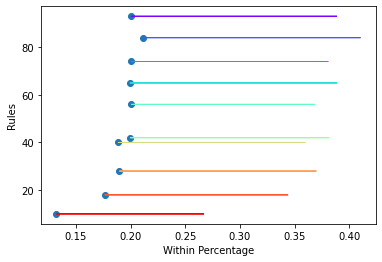

<Figure size 720x720 with 0 Axes>

In [19]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


plt.scatter(Within_Train, Number_of_rules)
for i in range(len(Number_of_rules)):
    
    plt.arrow(x=Within_Train[i],y=Number_of_rules[i],dx=Within_Test[i],dy=0,color=next(colors))


plt.xlabel('Within Percentage')
plt.ylabel('Rules')
plt.figure(figsize=(10,10))
plt.show()

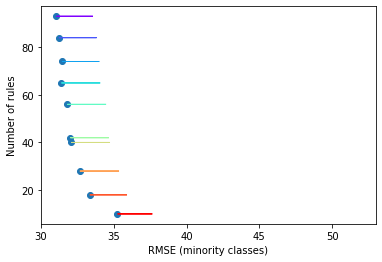

<Figure size 720x720 with 0 Axes>

In [20]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))

plt.xlabel('RMSE Error')
plt.ylabel('Rules')
plt.xlabel('RMSE (minority classes)')
plt.ylabel('Number of rules')
plt.xlim([30,53])

plt.scatter(Score_train, Number_of_rules)
for i in range(len(Number_of_rules)):
    
    plt.arrow(x=Score_train[i],y=Number_of_rules[i],dx=Diference_error[i],dy=0,color=next(colors))

    
plt.figure(figsize=(10,10))
plt.show()

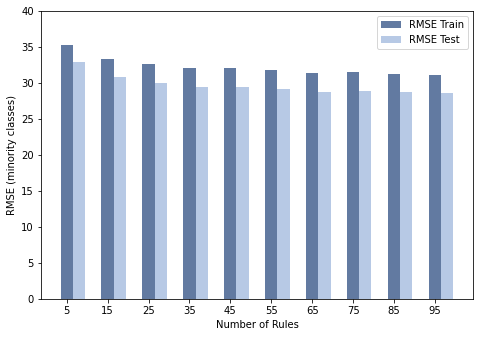

In [21]:
import numpy as np
import matplotlib.pyplot as plt

Rev_Score_train=Score_train[::-1]
Rev_Score_test=Score_test[::-1]

X = np.arange(5,105,10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Rev_Score_train, color = '#627aa1', width =3)
ax.bar(X +3,Rev_Score_test , color = '#b7c9e5', width =3)
plt.ylabel('RMSE (minority classes)')   
plt.xlabel('Number of Rules')
plt.xticks(X) 
plt.ylim([0,40]) 
ax.legend(['RMSE Train','RMSE Test'])

In [22]:
curve=1

Score_test=[]
Score_train=[]
Number_of_rules=[]
Within_Test=[]
Within_Train=[]
Diference_error=[]

for rules_n in range(number_of_rules):

    Score_train_intercalar=abs(Rashomon_curve_speciality[curve][rules_n]['Score R2 Train Categorical'])
    Score_test_intercalar=abs(Rashomon_curve_speciality[curve][rules_n]['Score R2 Test Categorical'])
    Number_of_rules_intercalar=Rashomon_curve_speciality[curve][rules_n]['Number Rules']
    Within_intercalar_test=Rashomon_curve_speciality[curve][rules_n]['Percentage Test Categorical'][0]
    Within_intercalar_train=Rashomon_curve_speciality[curve][rules_n]['Percentage Train Categorical'][0]
    
    
    Diference_error+=[abs(Score_test_intercalar-Score_train_intercalar)]

    Score_test+=[Score_test_intercalar]
    Score_train+=[Score_train_intercalar]
    Number_of_rules+=[Number_of_rules_intercalar]
    Within_Test+=[Within_intercalar_test]
    Within_Train+=[Within_intercalar_train]
    

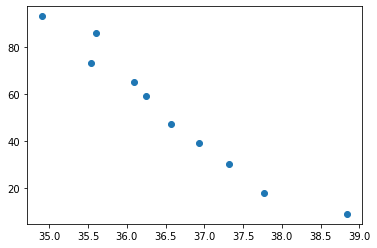

In [23]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


plt.scatter(Score_train, Number_of_rules)

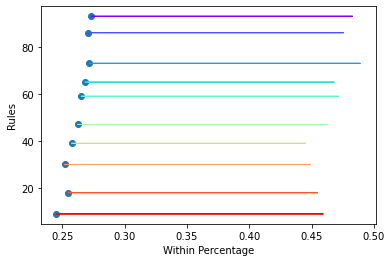

<Figure size 720x720 with 0 Axes>

In [24]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


plt.scatter(Within_Train, Number_of_rules)
for i in range(len(Number_of_rules)):
    
    plt.arrow(x=Within_Train[i],y=Number_of_rules[i],dx=Within_Test[i],dy=0,color=next(colors))


plt.xlabel('Within Percentage')
plt.ylabel('Rules')
plt.figure(figsize=(10,10))
plt.show()

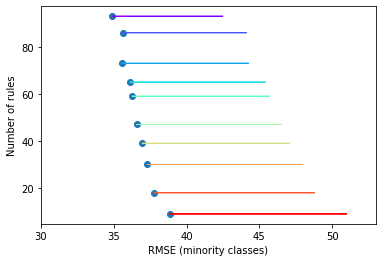

<Figure size 720x720 with 0 Axes>

In [25]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))

plt.xlabel('RMSE (minority classes)')
plt.ylabel('Number of rules')
plt.xlim([30,53])
plt.scatter(Score_train, Number_of_rules)
for i in range(len(Number_of_rules)):
    
    plt.arrow(x=Score_train[i],y=Number_of_rules[i],dx=Diference_error[i],dy=0,color=next(colors))

    
plt.figure(figsize=(10,10))
plt.show()

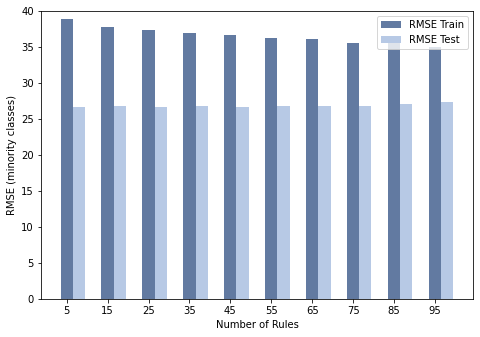

In [26]:
import numpy as np
import matplotlib.pyplot as plt

Rev_Score_train=Score_train[::-1]
Rev_Score_test=Score_test[::-1]

X = np.arange(5,105,10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylabel('RMSE (minority classes)')   
plt.xlabel('Number of Rules')
ax.bar(X + 0.00, Rev_Score_train, color = '#627aa1', width =3)
ax.bar(X +3,Rev_Score_test , color = '#b7c9e5', width =3)
plt.xticks(X)  
plt.ylim([0,40]) 
ax.legend(['RMSE Train','RMSE Test'])

* ## 5 seems the optimal value in Rashomon elbow

In [27]:
curve=1
value=5

In [28]:
Best_model=Rashomon_curve_speciality[curve][value]['Model']

In [29]:
len(Rashomon_curve_speciality[curve][value]['Rules_non0'])

47

In [30]:
dataset_predicton=Rashomon_curve_speciality[curve][value]['Dataset_predicton']

In [31]:
mean_squared_error(dataset_predicton['Labels from RuleFit'],dataset_predicton['Real Duration'],squared=False)

17.759406659570878

In [32]:
mean_squared_error(dataset_predicton['Planned by Cuf'],dataset_predicton['Real Duration'],squared=False)

21.365684826161687

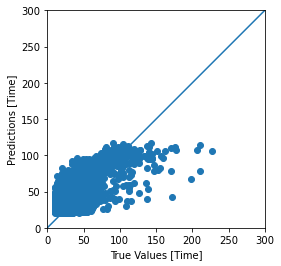

In [33]:
a = plt.axes(aspect='equal')
plt.scatter(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

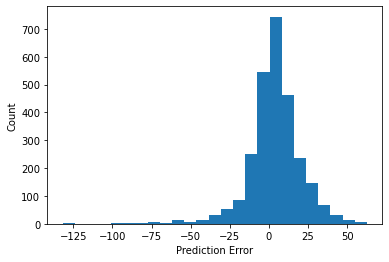

In [34]:
error = dataset_predicton['Labels from RuleFit'] - dataset_predicton['Real Duration']
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

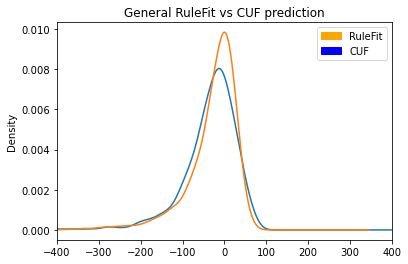

In [35]:

def percCal(x,y):
    return (x-y)*100/x

def percCal2(x,y):
    return abs(x-y)


dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])
dataset_predicton['Minutes_RuleFit'] = percCal2(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
dataset_predicton['Minutes_CUF'] = percCal2(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_RuleFit'].plot(kind='density')
plt.xlim([-400, 400])
plt.title('General RuleFit vs CUF prediction')
orange_patch = matplotlib.patches.Patch(color='orange', label='RuleFit')
blue_patch = matplotlib.patches.Patch(color='blue', label='CUF')
plt.legend(handles=[orange_patch,blue_patch])

In [36]:
dataset_predicton['Minutes_CUF'].sum()/2729

14.803224624404544

In [37]:
dataset_predicton['Minutes_RuleFit'].sum()/2729

12.257793985597397

In [38]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['RuleFit Model', RuleFit_Within, RuleFit_overuse,RuleFit_under]]
print(tabulate(table2))

-------------  -------------------  -------------------  ------------------
Model          Within               Overutilization      Underutilization
CUF Model      0.15793330890436058  0.22572370831806524  0.6163429827775742
RuleFit Model  0.21179919384389886  0.2557713448149505   0.5324294613411507
-------------  -------------------  -------------------  ------------------


In [39]:
dataset_predicton['Labels from RuleFit'].to_csv('Labels_RuleFit_speciality_notimbalance',index=False)

In [40]:
np.round(mean_squared_error(dataset_predicton['Labels from RuleFit'],dataset_predicton['Real Duration'],squared=False))
   

18.0

In [41]:
np.round(mean_squared_error(dataset_predicton['Planned by Cuf'],dataset_predicton['Real Duration'],squared=False))


21.0

* Generalization Set

In [45]:
generalization_dataset_speciality=Datasets_speciality_ophthalmology['GeneralizationSet_After_Encoding']

generalization_features_speciality = generalization_dataset_speciality.copy()
generalization_labels_speciality = generalization_features_speciality.pop('Real Room Duration')
generalization_CUF_labels_speciality = generalization_features_speciality.pop('CUF Planned Duration')

generalization_dataset_speciality= np.asarray(generalization_dataset_speciality).astype(np.float32)

    #Features
generalization_features_speciality= np.asarray(generalization_features_speciality).astype(np.float32)

#labels
generalization_labels_speciality= np.asarray(generalization_labels_speciality).astype(np.float32)


In [46]:
labels_generalization=Best_model.predict(generalization_features_speciality)
dataset_predicton_generalization = {"Real Duration": generalization_labels_speciality, "Planned by Cuf": generalization_CUF_labels_speciality, "Labels from RuleFit": labels_generalization}
    
dataset_predicton_generalization=pd.DataFrame(dataset_predicton_generalization)
dataset_predicton_generalization

,Real Duration,Planned by Cuf,Labels from RuleFit
15426,21.0,30,38.277077
17123,25.0,30,41.396279
23341,24.0,30,38.733406
15034,26.0,30,50.779525
26306,26.0,45,36.490556
...,...,...,...
931,37.0,60,29.576139
12341,62.0,30,26.587669
19331,25.0,60,29.888760
716,22.0,30,25.746769


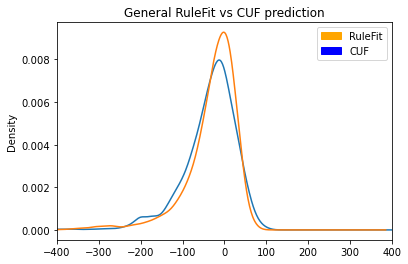

In [47]:

def percCal(x,y):
    return (x-y)*100/x

def percCal2(x,y):
    return abs(x-y)


dataset_predicton_generalization['Error_RuleFit'] = percCal(dataset_predicton_generalization['Real Duration'], dataset_predicton_generalization['Labels from RuleFit'])
dataset_predicton_generalization['Error_CUF'] = percCal(dataset_predicton_generalization['Real Duration'], dataset_predicton_generalization['Planned by Cuf'])
dataset_predicton_generalization['Minutes_RuleFit'] = percCal2(dataset_predicton_generalization['Real Duration'], dataset_predicton_generalization['Labels from RuleFit'])
dataset_predicton_generalization['Minutes_CUF'] = percCal2(dataset_predicton_generalization['Real Duration'], dataset_predicton_generalization['Planned by Cuf'])


dataset_predicton_generalization['Error_CUF'].plot(kind='density')
dataset_predicton_generalization['Error_RuleFit'].plot(kind='density')
plt.xlim([-400, 400])
plt.title('General RuleFit vs CUF prediction')
orange_patch = matplotlib.patches.Patch(color='orange', label='RuleFit')
blue_patch = matplotlib.patches.Patch(color='blue', label='CUF')
plt.legend(handles=[orange_patch,blue_patch])

In [48]:
#Overutilization 
CUF_overuse=dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']>10].shape[0]/dataset_predicton_generalization.shape[0]
RuleFit_overuse=dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']>10].shape[0]/dataset_predicton_generalization.shape[0]
#Underutilization
CUF_under=dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']<-10].shape[0]/dataset_predicton_generalization.shape[0]
RuleFit_under=dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']<-10].shape[0]/dataset_predicton_generalization.shape[0]
#Within
CUF_Within=dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF'].abs()<=10].shape[0]/dataset_predicton_generalization.shape[0]
RuleFit_Within=dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton_generalization.shape[0]

table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['RuleFit Model', RuleFit_Within, RuleFit_overuse,RuleFit_under]]
print(tabulate(table2))

-------------  -------------------  -------------------  ------------------
Model          Within               Overutilization      Underutilization
CUF Model      0.15793330890436058  0.2205936240381092   0.6214730670575302
RuleFit Model  0.19347746427262733  0.24807621839501648  0.5584463173323562
-------------  -------------------  -------------------  ------------------


In [51]:
dataset=dataset_predicton_generalization[dataset_predicton_generalization['Real Duration']>40]

In [52]:
mean_squared_error(dataset['Labels from RuleFit'],dataset['Real Duration'],squared=False)

28.279443527751052

In [53]:
mean_squared_error(dataset['Planned by Cuf'],dataset['Real Duration'],squared=False)

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


35.54402340759977

In [66]:
dataset_predicton_generalization['Minutes_RuleFit'].sum()/2729

12.627086720981769

In [67]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']<-10]['Minutes_RuleFit'].sum()/dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']<-10].shape[0]

14.618686353209869

In [68]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']<-10]['Minutes_CUF'].sum()/dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']<-10].shape[0]

15.485259433962264

In [69]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']>10]['Minutes_RuleFit'].sum()/dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']>10].shape[0]

16.45150190246651

In [70]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']>10]['Minutes_CUF'].sum()/dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']>10].shape[0]

23.55481727574751

In [60]:
np.round(mean_squared_error(labels_generalization,generalization_labels_speciality,squared=False))
        
        

18.0

In [61]:
np.round(mean_squared_error(generalization_CUF_labels_speciality,generalization_labels_speciality,squared=False))
   

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


22.0

* ## Imbalance

In [32]:
curve=0
value=5

In [40]:
Best_model=Rashomon_curve_speciality[curve][value]['Model']


In [41]:
dataset_predicton=Rashomon_curve_speciality[curve][value]['Dataset_predicton']
dataset_predicton

,Real Duration,Planned by Cuf,Labels from RuleFit,Error_RuleFit,Error_CUF
1,36.0,60,42.283387,-17.453852,-66.666667
5,41.0,60,42.897960,-4.629170,-46.341463
13,30.0,60,25.500891,14.997030,-100.0
16,31.0,30,27.190418,12.288976,3.225806
22,58.0,60,37.049443,36.121650,-3.448276
...,...,...,...,...,...
27260,20.0,30,24.110098,-20.550490,-50.0
27278,25.0,30,23.042800,7.828799,-20.0
27283,45.0,30,24.066687,46.518473,33.333333
27284,30.0,20,21.513298,28.289005,33.333333


In [42]:
dataset_predicton['Labels from RuleFit'].to_csv('Labels_RuleFit_speciality_imbalance',index=False)